In [12]:
import cv2
from PIL import Image, ImageEnhance
import pytesseract
import matplotlib.pyplot as plt

In [13]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

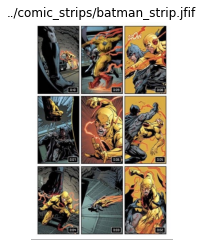

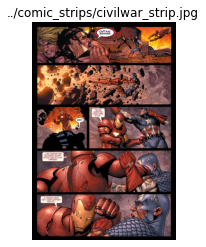

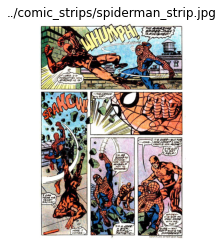

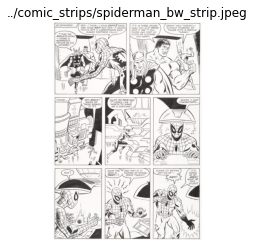

In [14]:
image_paths = ['../comic_strips/batman_strip.jfif', '../comic_strips/civilwar_strip.jpg',
               '../comic_strips/spiderman_strip.jpg','../comic_strips/spiderman_bw_strip.jpeg']

for image_path in image_paths:
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(image_path)
    plt.axis('off')
    plt.show()

In [15]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    
    # grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # remove noise
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # threshold
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    # dilation and erosion
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    thresh = cv2.dilate(thresh, kernel, iterations=1)
    thresh = cv2.erode(thresh, kernel, iterations=1)
    
    # image size
    height, width = thresh.shape
    thresh = cv2.resize(thresh, (2 * width, 2 * height), interpolation=cv2.INTER_LINEAR)
    
    return thresh

In [16]:
def enhance_image_contrast(image):
    enhancer = ImageEnhance.Contrast(image)
    enhanced_image = enhancer.enhance(2)
    return enhanced_image

In [17]:
def extract_text_from_image(image_path):
    processed_image = preprocess_image(image_path)
    
    # image to PIL format
    pil_image = Image.fromarray(processed_image)
    
    enhanced_image = enhance_image_contrast(pil_image)
    
    # custom configuration
    custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    text = pytesseract.image_to_string(enhanced_image, config=custom_config)
    
    return text

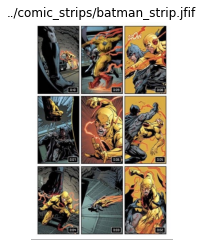

Text from ../comic_strips/batman_strip.jfif:
1 is
R WS apy 1a
me ry re AS
vhs Zep
By ie ip Gr a
aw Ne cS
iim




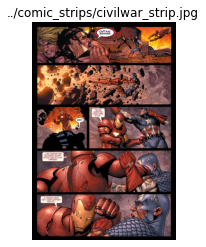

Text from ../comic_strips/civilwar_strip.jpg:
Sid mS carrainted aradpYnes 5S
ete fra in Ws hak efcwass Jays J st if ee Bs eel
Nae CONES eee Pieees
SASSY dee MN Te ago
ft ne UD Ke SDRSenn QoAwSSTs
y4 9 Cy ogee 4 S73 weer 2 wate
NIAGloeeslOtyLaayiste

nh 9 9 BteIPsadreeeees Tet ag
f WY SSARBeer8oth BReigtest Lefont
arate Sg B re age erty Sona 2a
aettaee eaBy wgyel eS cc at
PETDtat6we a PN whe dent ss a
W2gSUerOETMSSRQ
rans ofS ia a pester te i
X fie aS
I ALTER Ai tiny MEA

Meaalfterst sega CmetertN sTane 1s P
et eas a ve 4 a a hier lSelORE ean Ze ee




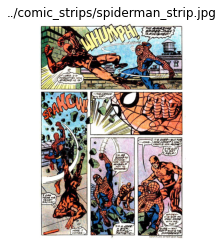

Text from ../comic_strips/spiderman_strip.jpg:
he 4 YX u Pte Cee wa
BSgFeGIIAON a
mar NPLaaieee




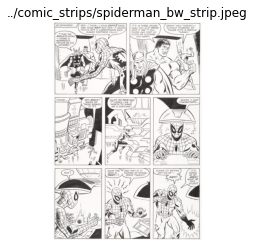

Text from ../comic_strips/spiderman_bw_strip.jpeg:
oat ftlVERPSe
04e TA nan een ove ey
hohe FOcspamee RSET
BaSNae ls ON a
Le cage 4e Tin ts




In [11]:
for image_path in image_paths:
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(image_path)
    plt.axis('off')
    plt.show()
    
    text = extract_text_from_image(image_path)
    print(f"Text from {image_path}:\n{text}\n")